# Projeto Ciencia de Dados: Carteira de Ações com Inteligência Artificial

- Projeto Inspiração: https://medium.com/swlh/teaching-a-machine-to-trade-stocks-like-warren-buffett-part-i-445849b208c6
- Resumo Fundamentos Empresas BR: https://fundamentus.com.br/index.php

### Criar Dicionários de Dataframes com cada empresa

In [168]:
import pandas as pd
import os

empresas = ["ABEV3", "AZUL4", "BTOW3", "B3SA3", "BBSE3", "BRML3", "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRFS3", "BPAC11", "CRFB3", "CCRO3", "CMIG4", "HGTX3", "CIEL3", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CVCB3", "CYRE3", "ECOR3", "ELET6", "EMBR3", "ENBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", "NTCO3", "HAPV3", "HYPE3", "IGTA3", "GNDI3", "ITSA4", "ITUB4", "JBSS3", "JHSF3", "KLBN11", "RENT3", "LCAM3", "LAME4", "LREN3", "MGLU3", "MRFG3", "BEEF3", "MRVE3", "MULT3", "PCAR3", "PETR4", "BRDT3", "PRIO3", "QUAL3", "RADL3", "RAIL3", "SBSP3", "SANB11", "CSNA3", "SULA11", "SUZB3", "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VVAR3", "WEGE3", "YDUQ3"]
# fundamentos = {
#     "ABEV3": balanco_dre_abev3,
#     "MGLU3": balanco_dre_mglu3
# }
fundamentos = {}
arquivos = os.listdir("balancos")
for arquivo in arquivos:
    nome = arquivo[-9:-4]
    if "11" in nome:
        nome = arquivo[-10:-4]
    if nome in empresas:
        print(nome)
        # pegar o balanco daquela empresa
        balanco = pd.read_excel(f'balancos/{arquivo}', sheet_name=0)
        # na primeira coluna colocar o título com o nome da empresa
        balanco.iloc[0, 0] = nome
        # pegar 1ª linha e tornar um cabeçalho
        balanco.columns = balanco.iloc[0]
        balanco = balanco[1:]
        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        balanco = balanco.set_index(nome)
        dre = pd.read_excel(f'balancos/{arquivo}', sheet_name=1)
        # na primeira coluna colocar o título com o nome da empresa
        dre.iloc[0, 0] = nome
        # pegar 1ª linha e tornar um cabeçalho
        dre.columns = dre.iloc[0]
        dre = dre[1:]
        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        dre = dre.set_index(nome)
        fundamentos[nome] = balanco.append(dre)

ABEV3
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
AZUL4
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
B3SA3
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
BBAS3
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 

### Pegar Preços das Ações nas Datas Correspondentes

In [169]:
cotacoes_df = pd.read_excel("Cotacoes.xlsx")
cotacoes = {}
for empresa in cotacoes_df["Empresa"].unique():
    cotacoes[empresa] = cotacoes_df.loc[cotacoes_df['Empresa']==empresa, :]

In [170]:
print(len(cotacoes))

77


### Remover empresas que tem cotações vazias da análise (mesmo após o tratamento que fizemos na hora de pegar as cotações)

In [171]:
for empresa in empresas:
    if cotacoes[empresa].isnull().values.any():
        cotacoes.pop(empresa)
        fundamentos.pop(empresa)
empresas = list(cotacoes.keys())
print(len(empresas))

65


### Juntar fundamentos com Preço da Ação

In [172]:
# no cotacoes: jogar as datas para índice
# no fundamnetos:
    # trocar linhas por colunas
    # tratar as datas para formato de data do python
    # juntar os fundamentos com a coluna Adj Close das cotacoes
for empresa in fundamentos:
    tabela = fundamentos[empresa].T
    tabela.index = pd.to_datetime(tabela.index, format="%d/%m/%Y")
    tabela_cotacao = cotacoes[empresa].set_index("Date")
    tabela_cotacao = tabela_cotacao[["Adj Close"]]
    
    tabela = tabela.merge(tabela_cotacao, right_index=True, left_index=True)
    tabela.index.name = empresa
    fundamentos[empresa] = tabela
display(fundamentos["ABEV3"])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Receitas,Despesas,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Participações/Contribuições Estatutárias,Reversão dos Juros sobre Capital Próprio,Part. de Acionistas Não Controladores,Lucro/Prejuízo do Período,Adj Close
ABEV3,,,,,,,,,,,,,,,,,,,,,
2020-12-31,125196574.72,35342614.528,17090335.744,1700028.032,4303137.792,7605904.896,0,3287141.888,293552,1062513.984,...,NaN,NaN,8464308.224,93644,-1667579.008,NaN,NaN,-104363.008,6786009.6,15.575767
2020-09-30,127056781.312,39098793.984,21660450.816,1442923.008,4156922.88,7341836.8,0,3472880.896,298303.008,725478.976,...,NaN,NaN,2431040,-415548,343476,NaN,NaN,-84167,2274800.896,12.159024
2020-06-30,121393004.544,36268126.208,17438951.424,44823,4201583.104,7771618.816,0,5390340.096,356411.008,1064401.984,...,NaN,NaN,1108173.056,-431944.992,595088,NaN,NaN,-44517,1226798.976,13.710416
2020-03-31,113687560.192,31086356.48,13204471.808,44823,3394298.112,7752655.872,0,5266407.936,447473.984,976225.024,...,NaN,NaN,1490919.936,-295032.992,15365,NaN,NaN,-119468,1091783.936,11.557861
2019-12-31,101742944.256,27621136.384,11900665.856,14558,4495524.864,5978556.928,0,4074127.104,512532,645171.968,...,NaN,NaN,3755047.68,1317924.992,-853995.008,NaN,NaN,-119273.008,4099704.832,18.102791
2019-09-30,102475317.248,29004025.856,15016913.92,14304,4236257.024,5978811.904,0,2545863.936,293060,918814.976,...,NaN,NaN,2826416.896,-649270.016,427238.016,NaN,NaN,-106708,2497677.056,18.187490
2019-06-30,98738978.816,27356035.072,14233403.392,14038,4103118.08,6197564.928,0,1542556.032,507216,758140.992,...,NaN,NaN,2980011.008,-807523.968,443414.016,NaN,NaN,-95168,2520732.928,16.902554
2019-03-31,96905535.488,26194137.088,12822524.928,13772,3980359.936,6032743.936,0,1980342.016,591273.984,773121.024,...,NaN,NaN,3381529.088,-979185.024,346724,NaN,NaN,-87218,2661850.112,15.901062
2018-12-31,94126137.344,25329604.608,11463497.728,13391,4879256.064,5401793.024,0,2148713.984,741222.016,681731.008,...,NaN,NaN,4591409.152,33055.072,-1160932.992,NaN,NaN,-103125.992,3360404.736,14.531096


### Tratar colunas
    
1. Vamos pegar apenas empresas que possuem as mesmas colunas
2. Ajeitar colunas com nome repetido
3. Analisar valores vazios nas colunas

#### 1. Remover da análise tabelas que tem colunas diferentes

In [173]:
colunas = list(fundamentos["ABEV3"].columns)

for empresa in empresas:
    if set(colunas) != set(fundamentos[empresa].columns):
        fundamentos.pop(empresa)
print(len(fundamentos))

61


####  2. Ajeitando colunas com o mesmo nome

In [174]:
texto_colunas = ";".join(colunas)

colunas_modificadas = []
for coluna in colunas:
    if colunas.count(coluna) == 2 and coluna not in colunas_modificadas:
        texto_colunas = texto_colunas.replace(";" + coluna + ";",";" + coluna + "_1;", 1)
        colunas_modificadas.append(coluna)
colunas = texto_colunas.split(';')
print(colunas)

['Ativo Total', 'Ativo Circulante', 'Caixa e Equivalentes de Caixa', 'Aplicações Financeiras', 'Contas a Receber_1', 'Estoques_1', 'Ativos Biológicos_1', 'Tributos a Recuperar', 'Despesas Antecipadas_1', 'Outros Ativos Circulantes', 'Ativo Realizável a Longo Prazo', 'Aplicações Financeiras Avaliadas a Valor Justo', 'Aplicações Financeiras Avaliadas ao Custo Amortizado', 'Contas a Receber', 'Estoques', 'Ativos Biológicos', 'Tributos Diferidos_1', 'Despesas Antecipadas', 'Créditos com Partes Relacionadas', 'Outros Ativos Não Circulantes', 'Investimentos', 'Imobilizado', 'Intangível', 'Diferido', 'Passivo Total', 'Passivo Circulante', 'Obrigações Sociais e Trabalhistas', 'Fornecedores', 'Obrigações Fiscais', 'Empréstimos e Financiamentos_1', 'Passivos com Partes Relacionadas_1', 'Dividendos e JCP a Pagar', 'Outros_1', 'Provisões_1', 'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados_1', 'Passivo Não Circulante', 'Empréstimos e Financiamentos', 'Passivos com Partes Relacionadas'

In [175]:
# implementar as colunas nas tabelas

for empresa in fundamentos:
    fundamentos[empresa].columns = colunas

#### 3. Analisar valores vazios nas colunas

In [176]:
# valores_vazios = {
#     "Ativo Total": 0,
#     "Passivo Total": 0,
# }
valores_vazios = dict.fromkeys(colunas, 0)
total_linhas = 0
for empresa in fundamentos:
    tabela = fundamentos[empresa]
    total_linhas += tabela.shape[0]
    for coluna in colunas:
        qtde_vazios = pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna] += qtde_vazios
print(valores_vazios)
print(total_linhas)

{'Ativo Total': 0, 'Ativo Circulante': 0, 'Caixa e Equivalentes de Caixa': 0, 'Aplicações Financeiras': 0, 'Contas a Receber_1': 0, 'Estoques_1': 0, 'Ativos Biológicos_1': 0, 'Tributos a Recuperar': 0, 'Despesas Antecipadas_1': 0, 'Outros Ativos Circulantes': 0, 'Ativo Realizável a Longo Prazo': 0, 'Aplicações Financeiras Avaliadas a Valor Justo': 0, 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 0, 'Contas a Receber': 0, 'Estoques': 0, 'Ativos Biológicos': 0, 'Tributos Diferidos_1': 0, 'Despesas Antecipadas': 0, 'Créditos com Partes Relacionadas': 0, 'Outros Ativos Não Circulantes': 0, 'Investimentos': 0, 'Imobilizado': 0, 'Intangível': 0, 'Diferido': 0, 'Passivo Total': 0, 'Passivo Circulante': 0, 'Obrigações Sociais e Trabalhistas': 0, 'Fornecedores': 0, 'Obrigações Fiscais': 0, 'Empréstimos e Financiamentos_1': 0, 'Passivos com Partes Relacionadas_1': 0, 'Dividendos e JCP a Pagar': 0, 'Outros_1': 0, 'Provisões_1': 0, 'Passivos sobre Ativos Não-Correntes a Venda e Descontin

In [177]:
remover_colunas = []
for coluna in valores_vazios:
    if valores_vazios[coluna] > 50:
        remover_colunas.append(coluna)

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis=1)
    fundamentos[empresa] = fundamentos[empresa].ffill()

In [178]:
fundamentos["ABEV3"].shape

(33, 72)

### Criando os rótulos: Comprar, Não Comprar ou Vender?

Não queremos saber quando vender, mas inclui essa categoria para conseguir identificar quando que o nosso modelo vai sugerir uma compra quando na verdade o melhor momento era vender. Isso significa que o modelo errou "mais" do que quando sugeriu comprar e simplesmente o certo era não comprar

Regra: 
1. Subiu mais do que o Ibovespa (ou caiu menos) -> Comprar (Valor = 2)
2. Subiu menos do que o Ibovespa até Ibovespa - 2% (ou caiu mais do que Ibovespa até Ibovespa -2%) -> Não Comprar (Valor = 1)
3. Subiu menos do que o Ibovespa - 2% (ou caiu mais do que Ibovespa -2%) -> Vender (Valor = 0)

In [179]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [180]:
data_inical = '12/20/2012'
data_final = '04/20/2021'

from pandas_datareader import data as web
df_ibov = web.DataReader('^BVSP', data_source='yahoo', start=data_inical, end=data_final)


In [181]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [182]:
import numpy as np
# add linhas de fundamentos
datas = fundamentos['ABEV3'].index
for data in datas:
  if data not in df_ibov.index:
    df_ibov.loc[data] = np.nan

df_ibov = df_ibov.sort_index() # forçando as datas ficarem em ordem crescente
df_ibov = df_ibov.ffill()
df_ibov = df_ibov.rename(columns={'Adj Close': 'IBOV'}) #Renomenando Adj Close
display(df_ibov)

,High,Low,Open,Close,Volume,IBOV
Date,,,,,,
2012-12-20,61276.0,60622.0,60992.0,61276.0,3083400.0,61276.0
2012-12-21,61271.0,60221.0,61271.0,61007.0,3157400.0,61007.0
2012-12-26,61322.0,60861.0,61003.0,60960.0,2598000.0,60960.0
2012-12-27,61191.0,60233.0,60964.0,60416.0,2852600.0,60416.0
2012-12-28,61066.0,60416.0,60416.0,60952.0,2626000.0,60952.0
...,...,...,...,...,...,...
2021-04-14,120871.0,119298.0,119298.0,120295.0,10076600.0,120295.0
2021-04-15,121409.0,120084.0,120290.0,120701.0,7948100.0,120701.0
2021-04-16,121333.0,120199.0,120701.0,121114.0,7945600.0,121114.0


In [183]:
# mesclando tabela do ÍNDICE_BOVESPA com a tabela principal FUNDAMENTOS
for empresa in fundamentos:
  fundamentos[empresa] = fundamentos[empresa].merge(df_ibov[['IBOV']], left_index=True, right_index=True)

display(fundamentos['ABEV3'])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV
2020-12-31,1.251966e+08,3.534261e+07,1.709034e+07,1700028.032,4303137.792,7605904.896,0,3287141.888,293552.000,1062513.984,...,-9428,1040928.960,2144160.000,-1103231.104,8464308.224,93644.000,-1667579.008,6786009.600,15.575767,119306.0
2020-09-30,1.270568e+08,3.909879e+07,2.166045e+07,1442923.008,4156922.880,7341836.800,0,3472880.896,298303.008,725478.976,...,-11002,-1144775.936,369476.992,-1514253.056,2431040.000,-415548.000,343476.000,2274800.896,12.159024,94603.0
2020-06-30,1.213930e+08,3.626813e+07,1.743895e+07,44823.000,4201583.104,7771618.816,0,5390340.096,356411.008,1064401.984,...,-16237,-793734.976,236606.000,-1030340.992,1108173.056,-431944.992,595088.000,1226798.976,13.710416,95056.0
2020-03-31,1.136876e+08,3.108636e+07,1.320447e+07,44823.000,3394298.112,7752655.872,0,5266407.936,447473.984,976225.024,...,-6617,-1536866.944,245776.000,-1782642.944,1490919.936,-295032.992,15365.000,1091783.936,11.557861,73020.0
2019-12-31,1.017429e+08,2.762114e+07,1.190067e+07,14558.000,4495524.864,5978556.928,0,4074127.104,512532.000,645171.968,...,-11195,-1564263.936,234065.056,-1798328.832,3755047.680,1317924.992,-853995.008,4099704.832,18.102791,115964.0
2019-09-30,1.024753e+08,2.900403e+07,1.501691e+07,14304.000,4236257.024,5978811.904,0,2545863.936,293060.000,918814.976,...,-8248,-305798.016,867204.992,-1173003.008,2826416.896,-649270.016,427238.016,2497677.056,18.187490,104745.0
2019-06-30,9.873898e+07,2.735604e+07,1.423340e+07,14038.000,4103118.080,6197564.928,0,1542556.032,507216.000,758140.992,...,-731,-567436.992,249903.008,-817340.032,2980011.008,-807523.968,443414.016,2520732.928,16.902554,100967.0
2019-03-31,9.690554e+07,2.619414e+07,1.282252e+07,13772.000,3980359.936,6032743.936,0,1980342.016,591273.984,773121.024,...,-2136,-672067.968,287692.992,-959761.024,3381529.088,-979185.024,346724.000,2661850.112,15.901062,95415.0
2018-12-31,9.412614e+07,2.532960e+07,1.146350e+07,13391.000,4879256.064,5401793.024,0,2148713.984,741222.016,681731.008,...,1140,-1618994.944,19940.992,-1638935.808,4591409.152,33055.072,-1160932.992,3360404.736,14.531096,87887.0
2018-09-30,9.569104e+07,2.620002e+07,1.222767e+07,13008.000,4285633.024,5349087.232,0,2215026.944,439839.008,1669756.032,...,-3272,-611080.000,245288.992,-856369.024,2754401.024,-475184.992,612889.984,2831159.040,16.978544,79342.0


In [184]:

#! Tornar os indicadores em Percentuais
#- FUNDAMENTO%tri = fundamento tr / fundamento tr anterior
#- COTACAO%tri = cotacao tri seguinte / contacao tr

for empresa in fundamentos:
  fundamento = fundamentos[empresa]
  fundamento = fundamento.sort_index()
  #nota: for dentro de tabela tabela ele percorre as colunas
  for coluna in fundamento:
    if 'Adj Close' in coluna or 'IBOV' in coluna:
      #pegar cotação seguinte
      fundamento['Adj Close'] = fundamento['Adj Close'].shift(-1) / fundamento['Adj Close'] - 1
      fundamento['IBOV'] = fundamento['IBOV'].shift(-1) / fundamento['IBOV'] - 1
      fundamento['Resultado'] = fundamento['Adj Close'] - fundamento['IBOV']
      
      condicoes = [
        (fundamento['Resultado'] > 0),
        (fundamento['Resultado'] < 0) & (fundamento['Resultado']>= -0.02),
        (fundamento['Resultado'] < -0.02)
      ]
      valores = [2, 1, 0]
      fundamento['Decisao'] = np.select(condicoes, valores)
    else:
      ValorAtual = fundamento[coluna]
      ValorAnterior = fundamento[coluna].shift(1)
      #pegar cotação anterior
      condicoes = [
       (ValorAnterior >  0) & (ValorAtual <  0), 
       (ValorAnterior <  0) & (ValorAtual >  0), 
       (ValorAnterior <  0) & (ValorAtual <  0), 
       (ValorAnterior == 0) & (ValorAtual >  0), 
       (ValorAnterior == 0) & (ValorAtual <  0), 
       (ValorAnterior <  0) & (ValorAtual == 0), 
      ]
      valores = [
        -1,
        1,
        (abs(ValorAnterior)-abs(ValorAtual)) / abs(ValorAnterior),
        1,
        -1,
        1,
      ]
      fundamento[coluna] = np.select(condicoes, valores, default=ValorAtual/ValorAnterior-1)
  
  fundamentos[empresa] = fundamento
display(fundamentos['ABEV3'])


,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV,Resultado,Descisao
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.845525,1.091543,-2.937068,0
2013-03-31,-0.004402,0.082509,0.540941,NaN,-0.855514,NaN,NaN,-0.878257,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.529244,-1.651586,3.180831,2
2013-06-30,42.823044,154.470551,59.403415,1.000000,895.341086,1.000000,NaN,3040.654255,1.000000,1.000000,...,68.350400,-1.000000,240.798915,-3992.348051,1.000000,115.885753,-0.235032,-1.154374,0.919343,2
2013-09-30,0.014976,0.034944,0.078755,0.259921,-0.012680,-0.051246,NaN,0.150925,-0.053987,0.184512,...,0.425526,-0.705429,0.312139,0.413319,-1.000000,1.005453,-1.547382,0.335280,-1.882663,0
2013-12-31,0.151882,0.640439,1.334113,-0.528801,0.315030,0.080784,NaN,0.642232,0.326698,0.198435,...,2.318989,-1.081397,1.589715,-1.460893,0.573658,1.661370,4.387153,-3.575669,7.962822,2
2014-03-31,-0.078297,-0.201158,-0.353510,0.421231,-0.139316,0.095442,NaN,0.016833,-0.133515,0.226973,...,-0.662614,0.593060,-0.616634,-0.048470,1.000000,-0.582090,-1.416533,-0.673479,-0.743054,0
2014-06-30,-0.004866,-0.035410,-0.140116,-0.073713,0.137713,0.018993,NaN,0.063286,-0.189384,0.071060,...,0.329060,0.004367,-0.215038,0.699624,-0.923330,-0.149121,0.081295,-5.258459,5.339754,2
2014-09-30,0.033925,-0.020712,-0.083799,0.386513,-0.074255,0.012343,NaN,0.129495,-0.024556,0.237706,...,0.250902,0.013409,0.323985,-1.989595,14.392936,0.298455,6.303519,-1.301027,7.604545,2
2014-12-31,0.107749,0.341943,0.691348,0.353403,-0.075340,0.079871,NaN,-0.072745,0.448937,2.030331,...,-0.001110,-0.646470,0.673428,1.000000,-1.000000,0.613021,-0.849265,0.651662,-1.500927,0
2015-03-31,0.041002,-0.071757,-0.282603,0.449956,-0.043301,0.283355,NaN,-0.118599,-0.102662,0.249493,...,-0.157968,0.171903,-0.285186,-1.000000,0.967386,-0.380692,-0.079202,-5.003197,4.923995,2


In [185]:

#! Remover valores Vazios (Copiei de algum lugar la de cima)
colunas = list(fundamentos['ABEV3'].columns)
valores_vazios = dict.fromkeys(colunas, 0)
total_linhas = 0
for empresa in fundamentos:
    tabela = fundamentos[empresa]
    total_linhas += tabela.shape[0]
    for coluna in colunas:
        qtde_vazios = pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna] += qtde_vazios
print(valores_vazios)
print(total_linhas)

{'Ativo Total': 61, 'Ativo Circulante': 61, 'Caixa e Equivalentes de Caixa': 61, 'Aplicações Financeiras': 623, 'Contas a Receber_1': 65, 'Estoques_1': 483, 'Ativos Biológicos_1': 1874, 'Tributos a Recuperar': 266, 'Despesas Antecipadas_1': 1059, 'Outros Ativos Circulantes': 281, 'Ativo Realizável a Longo Prazo': 61, 'Aplicações Financeiras Avaliadas a Valor Justo': 1581, 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 1661, 'Contas a Receber': 937, 'Estoques': 1434, 'Ativos Biológicos': 1823, 'Tributos Diferidos_1': 822, 'Despesas Antecipadas': 1130, 'Créditos com Partes Relacionadas': 1271, 'Outros Ativos Não Circulantes': 426, 'Investimentos': 345, 'Imobilizado': 62, 'Intangível': 86, 'Diferido': 2004, 'Passivo Total': 61, 'Passivo Circulante': 61, 'Obrigações Sociais e Trabalhistas': 390, 'Fornecedores': 153, 'Obrigações Fiscais': 102, 'Empréstimos e Financiamentos_1': 85, 'Passivos com Partes Relacionadas_1': 1476, 'Dividendos e JCP a Pagar': 763, 'Outros_1': 113, 'Provisõ

In [186]:
#Removendo colunas que tenham mais de 1/3 do total de linhas (2004) com o valor Nan
#As colunas restantes, Substituir Nan por 0
remover_colunas = []
for coluna in valores_vazios:
    if valores_vazios[coluna] > total_linhas/3:
        remover_colunas.append(coluna)

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis=1)
    fundamentos[empresa] = fundamentos[empresa].fillna(0) #nota: fillna = Substituir Nan por um valor q vc escolher


In [187]:
for empresa in fundamentos:
  fundamentos[empresa] = fundamentos[empresa].drop(['Adj Close', 'IBOV', 'Resultado'], axis=1)
print(fundamentos['ABEV3'].shape)

(33, 47)


### Hora de tornar tudo 1 dataframe só

In [188]:
copia_fundamentos = fundamentos.copy()

In [189]:
base_dados = pd.DataFrame()
for empresa in copia_fundamentos:
  copia_fundamentos[empresa] = copia_fundamentos[empresa][1:-1]
  copia_fundamentos[empresa] = copia_fundamentos[empresa].reset_index(drop=True)
  base_dados = base_dados.append(copia_fundamentos[empresa])

display(base_dados)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Descisao
0,-0.004402,0.082509,0.540941,0.000000,-0.855514,0.000000,-0.878257,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,42.823044,154.470551,59.403415,1.000000,895.341086,1.000000,3040.654255,1.000000,2.274961,1.000000,...,-281.496855,1.000000,-1.000000,68.350400,-1.000000,240.798915,-3992.348051,1.000000,115.885753,2
2,0.014976,0.034944,0.078755,0.259921,-0.012680,-0.051246,0.150925,0.184512,-0.007786,0.079940,...,0.156800,39.123711,-0.840737,0.425526,-0.705429,0.312139,0.413319,-1.000000,1.005453,0
3,0.151882,0.640439,1.334113,-0.528801,0.315030,0.080784,0.642232,0.198435,-0.023974,0.080787,...,-3.692296,0.909044,-0.618082,2.318989,-1.081397,1.589715,-1.460893,0.573658,1.661370,2
4,-0.078297,-0.201158,-0.353510,0.421231,-0.139316,0.095442,0.016833,0.226973,-0.062046,-0.039055,...,0.658483,0.059219,0.539649,-0.662614,0.593060,-0.616634,-0.048470,1.000000,-0.582090,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.031644,0.028168,-0.481838,0.224456,-0.121143,0.000000,0.000000,-0.015853,0.102209,0.000000,...,0.161994,0.000000,-0.091126,0.345073,-0.168994,-0.247649,-1.000000,1.000000,-0.216981,2
27,-0.039680,-0.113458,0.216463,-0.302487,0.063002,0.000000,0.000000,0.334544,-0.048733,0.000000,...,1.000000,0.000000,-0.813999,-0.298814,-0.421378,-0.597406,1.000000,-1.000000,-0.619312,0
28,0.385180,1.257939,-0.151743,3.247502,-0.155226,0.000000,0.000000,0.284199,0.322417,0.000000,...,-1.000000,0.000000,0.268306,7.889552,-1.151573,1.874517,-1.000000,1.000000,1.891677,0
29,0.217202,-0.085474,0.964492,-0.255688,0.489504,0.000000,0.000000,0.311093,0.011341,0.000000,...,-13.986971,0.000000,-0.245308,-0.645767,0.395478,-1.000000,0.079702,0.791087,-1.000000,2


### Análise Exploratória

#### 1. Quantidade de Respostas em cada Tipo de Decisão

In [190]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [191]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [192]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [193]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

display(base_dados['Decisao'].value_counts(normalize=True).map('{:.2%}'.format))
fig = px.histogram(base_dados, x="Decisao", color="Decisao")
fig.show()

2    50.00%
0    49.63%
1     0.37%
Name: Descisao, dtype: object

In [194]:
#Transformar Categoria 1 em Categoria 0
base_dados.loc[base_dados['Decisao']==1, 'Decisao'] = 0

display(base_dados['Decisao'].value_counts(normalize=True).map('{:.2%}'.format))
fig = px.histogram(base_dados, x="Decisao", color="Decisao")
fig.show()

2    50.00%
0    50.00%
Name: Descisao, dtype: object

#### 2. Correlação

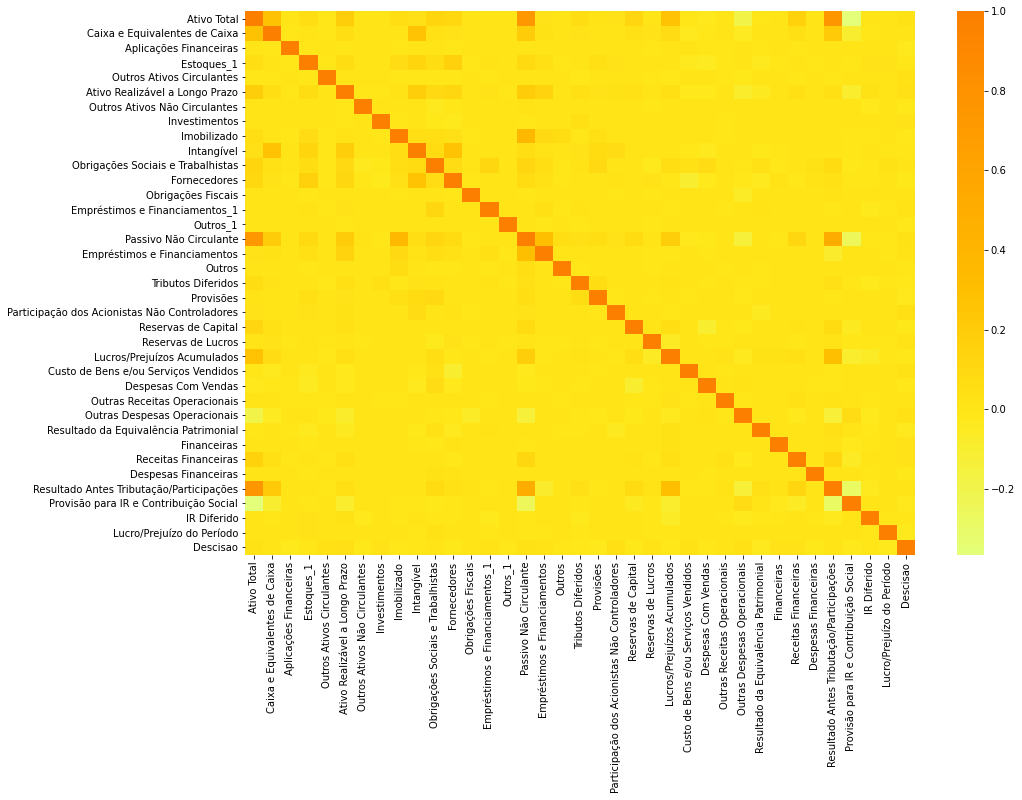

In [201]:
#Criando correlações
correlacoes = base_dados.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlacoes, cmap="Wistia", ax=ax)
plt.show()

#### Vamos remover Todas as Colunas "já explicadas" pelo Ativo Total

In [202]:
correlacoes_encontradas = []
for coluna in correlacoes:
  for linha in correlacoes.index:
    if linha != coluna:
      valor = abs(correlacoes.loc[linha, coluna])
      if valor > 0.8 and (coluna, linha, valor) not in correlacoes_encontradas:
        correlacoes_encontradas.append((linha, coluna, valor))
        print(f"|{linha}|{coluna}|{valor}|")

In [203]:
remover = ['Ativo Circulante', 'Contas a Receber_1', 'Tributos a Recuperar', 'Passivo Total', 'Passivo Circulante', 'Patrimônio Líquido', 'Capital Social Realizado', 'Receita Líquida de Vendas e/ou Serviços', 'Resultado Bruto', 'Despesas Gerais e Administrativas']
base_dados = base_dados.drop(remover, axis=1)
print(base_dados.shape)

KeyError: "['Ativo Circulante' 'Contas a Receber_1' 'Tributos a Recuperar'\n 'Passivo Total' 'Passivo Circulante' 'Patrimônio Líquido'\n 'Capital Social Realizado' 'Receita Líquida de Vendas e/ou Serviços'\n 'Resultado Bruto' 'Despesas Gerais e Administrativas'] not found in axis"

### Vamos partir para Feature Selection

Será que todas essas features são importantes mesmo para o nosso modelo? Muitas features nem sempre é bom, se pudermos reduzir sem perder eficiência do nosso modelo, melhor

Aqui temos 2 alternativas:

1. Seguir com todas as features e depois tentar melhorar o nosso modelo
2. Usar algum critério para selecionar as melhores features para prever e criar o modelo a partir apenas dessa seleção menor de features

Vou seguir com a opção 2, porque é mais rápida e, caso dê certo, facilita a nossa vida. Se der errado, a gente volta aqui e refaz o processo

In [198]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [206]:
 # vamos treinar uma árvore de descisão e pegar as características mais importantes
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier(random_state=1)
x = base_dados.drop("Decisao", axis=1)
y = base_dados["Decisao"]
modelo.fit(x, y)

caracteristicas_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending=False)
display(caracteristicas_importantes)
top10 = list(caracteristicas_importantes.index)[:10]
print(top10)

,0
Fornecedores,0.031278
Outros Ativos Não Circulantes,0.031150
Reservas de Lucros,0.031141
Provisões,0.030856
Obrigações Sociais e Trabalhistas,0.030641
Outras Despesas Operacionais,0.029995
Ativo Realizável a Longo Prazo,0.029954
Receitas Financeiras,0.029821
Passivo Não Circulante,0.029753
Despesas Financeiras,0.029002


['Fornecedores', 'Outros Ativos Não Circulantes', 'Reservas de Lucros', 'Provisões', 'Obrigações Sociais e Trabalhistas', 'Outras Despesas Operacionais', 'Ativo Realizável a Longo Prazo', 'Receitas Financeiras', 'Passivo Não Circulante', 'Despesas Financeiras']


### Aplicação do StandardScaler para melhorar nossos modelos de MachineLearning

### Separação dos dados em treino e teste

### Criação de um Dummy Classifier (Uma baseline para ver se os nossos modelos são melhores do que puro chute)

### Métricas de Avaliação

- Precisão vai ser nossa métrica principal
- Recall pode ser útil, mas precisão no caso de ações é mt mais importante.

Explicação: Foto dos Gatos e Cachorros na Wikipedia: https://en.wikipedia.org/wiki/Precision_and_recall

### Modelos que vamos testar
- AdaBoost
- Decision Tree
- Random Forest
- ExtraTree
- Gradient Boost
- K Nearest Neighbors (KNN)
- Logistic Regression
- Naive Bayes
- Support Vector Machine (SVM)
- Rede Neural

### Agora vamos ao tunning do modelo

- é bom sempre incluir no tuning os parâmetros "padrões" do modelo, se não poder ser que vc só encontre resultados piores

### Vamos seguir então com o Modelo BLA tunado para ser o nosso modelo

- Agora ao que interessa...será que vamos conseguir escolher boas ações e ter uma carteira rentável?
- Para isso, temos que pegar o último Trimestre (que não usamos para treinar o modelo nem testar) e ver como ele teria saído até o momento em que gravo esse vídeo...

### Repetindo os passos com a base fundamentos só que pegando apenas o último tri de cada empresa

### Agora fazemos a previsão de decisões